## Linear regression

The dataset used to perform linear regression is a Ecommerce dataset of a clothing store company. The goal is to help the company decide if they should concentrate on their mobile app service or website based on the yearly amount spent by the customers.

### Import packages
The basic packages are imported like numpy and pandas to deal with the data. For data visualization matplotlib and seaborn is imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data
The data has the following columns:

1) Customer info - Email

2) Customer info - Address

3) Customer info - color Avatar

4) Avg. Session Length: Average session of in-store style advice sessions

5) Time on App: Average time spent on App in minutes

6) Time on Website: Average time spent on Website in minutes

7) Length of Membership: How many years the customer has been a member.

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


By using the "info()" function, the information of the columns and entries are known. The datatype of the columns are also known from this.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


By using the describe() function, we can get the statistical information of numerical columns.

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Data visualization

Using the seaborn package, a pairplot can be plotted for the entire dataframe which takes into consideration only the numerical columns. It create histograms of all columns along eith the correlation scatter plots.

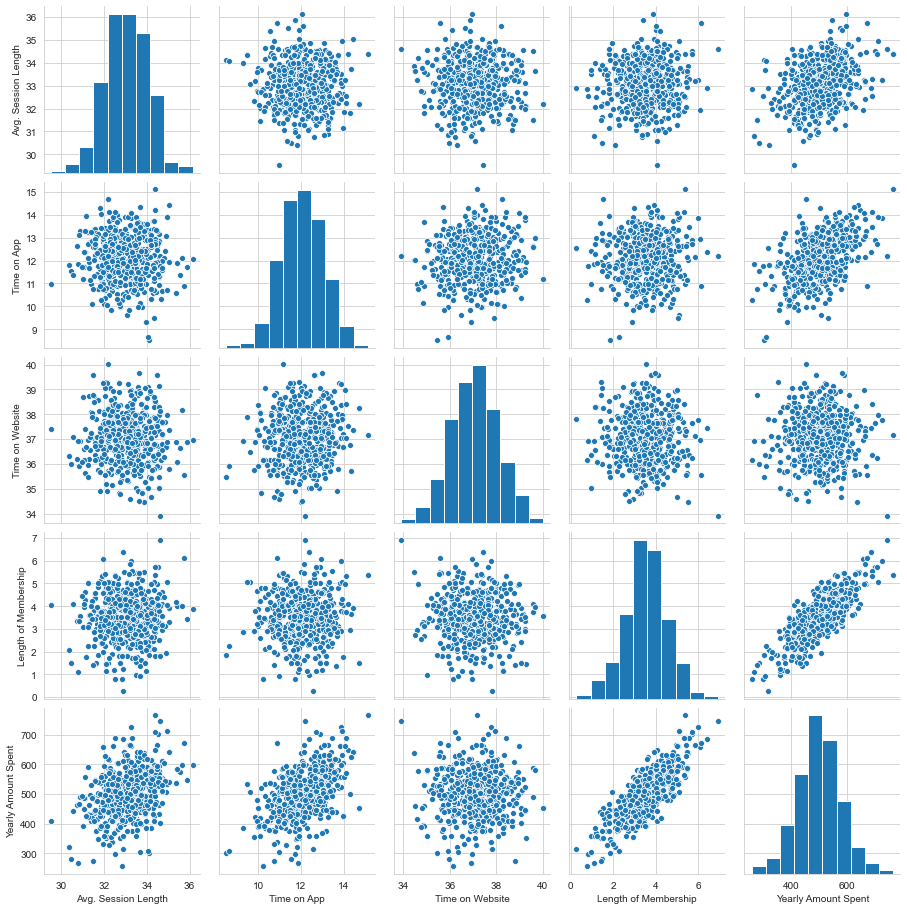

In [5]:
sns.set_style('whitegrid')
sns.pairplot(df)

Based on the above plot, it can be said that there is a linear relationship between the 'length of membership' and 'yearly amount spent'.

<AxesSubplot:xlabel='Yearly Amount Spent'>

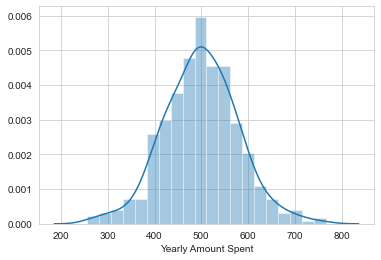

In [6]:
sns.distplot(df['Yearly Amount Spent'])

Based on the plot, it can be ascertained that the average lies somewhere near 500.

Next a correlation plot can be generated which shows the correlation between the columns. 1 denotes a very high correlation and 0 denotes no correlation.

<AxesSubplot:>

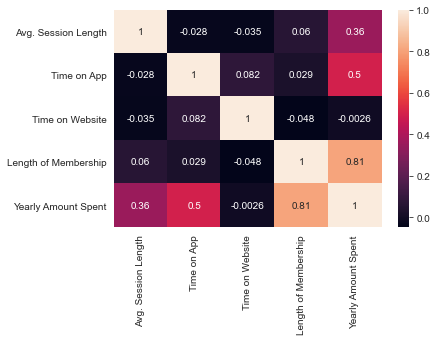

In [7]:
sns.heatmap(df.corr(),annot=True)

### Separating the predictor and target variable
Here the target variable is 'Yearly amount spent'. The predictor variables are the rest of the numerical columns since linear regression model do not work on categorical columns.

In [8]:
x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [9]:
y = df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

### Splitting into training and testing data
The scikit learn package helps in the splitting of data into train and test data. It is the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling. The splitting function is imported from sklearn. The 'x' and 'y' data is passed to the function which generates the splitted training and testing data. The test size determines how much proportion of data should be in the test. The value is between 0 to 1.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Training the model
The linear regression model is imported from the sklearn package. This model is available in the linear model family of sklearn. After importing the model, an instance of the model is created. Then this model is fit to the training dataset.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

### Predictions
The predictions can be found using the 'predict' method on the testing data of predictor variables. Then these predictions are compared with the actual testing data prediction to ascertain the accuracy of the model.

In [14]:
pred = lr.predict(x_test)
pred

array([577.87553409, 435.27155928, 546.5858502 , 391.51629942,
       607.95417641, 509.87240751, 619.18792019, 449.34481128,
       499.72263686, 456.3743405 , 702.5535645 , 532.00907121,
       419.00929766, 422.0531471 , 522.42093692, 622.93448731,
       597.85647196, 529.37417163, 550.61766264, 645.91902882,
       511.10091661, 387.50831556, 569.20568099, 508.7145671 ,
       477.74457363, 633.54984393, 444.94510612, 377.58045193,
       458.67551853, 510.65032511, 435.13467095, 495.12758721,
       475.93073995, 496.21315307, 593.57938862, 486.04699304,
       374.49575729, 424.715831  , 395.905017  , 462.84087273,
       552.82673105, 430.49487408, 657.13199715, 534.51162374,
       523.41754958, 535.23862076, 499.64655156, 456.85998823,
       579.46203072, 412.39008133, 559.00343422, 336.99188463,
       384.27433816, 529.48044837, 545.58599913, 519.79887644,
       448.83384893, 542.05362595, 474.96423107, 397.16357452,
       523.96227277, 503.94192956, 531.31656473, 489.43

By creating a scatter plot, we can visualize hoe far the predicted values are form the actual values.

Text(0, 0.5, 'Predicted Y')

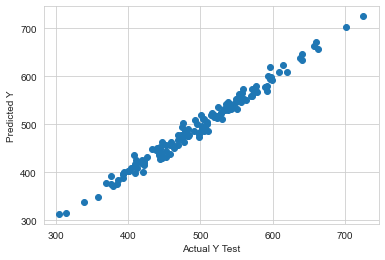

In [15]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Y Test')
plt.ylabel('Predicted Y')

By creating the residuals, a clear picture will be known of the data. The residual is the difference of the actual and predicted values. If the residual plot is normally distributed then it means that the choice of model was right.

<AxesSubplot:xlabel='Yearly Amount Spent'>

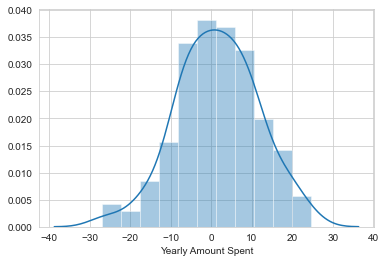

In [16]:
sns.distplot((y_test-pred))

### Evaluation metric
For regression there are 3 most important evaluation metrics.

1) Mean absolute error(MAE): It is the mean of the absolute value of the errors. It is the easiest to understand being just the average error.

2) Mean squared error(MSE): It is the mean of the squared errors. It punishes larger errors being more useful in real world.

3) Root mean squared error (RMSE): It is the square root of the mean of the squared errors. It is directly interpretable in the "y" units.

All these are considered as loss functions because the goal is to minimize them.

In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.078480566145505
MSE: 102.44872696972094
RMSE: 10.121695854436693


The intercepts and coefficients can be found. The coefficients relate to the respective columns.

In [18]:
lr.intercept_

-1048.1193023639814

In [19]:
lr.coef_

array([25.56507478, 39.11289398,  0.36517849, 61.42380206])

In [20]:
coef_col = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficients'])
coef_col

,Coefficients
Avg. Session Length,25.565075
Time on App,39.112894
Time on Website,0.365178
Length of Membership,61.423802


The meaning of these coefficients is as follows: 

1) If all the columns are held fixed and there is a unit increase in the time on app then there will be an increase of 38 dollars in price (yearly amount spent). 

2) If all the columns are held fixed and there is a unit increase in the time on website then there will be an increase of 0.7 dollars in price (yearly amount spent).

### Conclusion

A conclusion can be drawn from the coefficient interpretations that it will be fruitful to continue the Ecommerce business on the app and not the website.